In [1]:
import pickle
import numpy as np
import pandas as pd

# Exploració resultats

Exploració del resultat d'executar diverses metriques de nodes, als nodes de les tres matrius (FA, GM i RS) per separat, aplicant diferent threshold en els pesos de les arestes dels nodes, aplicant diferents criteris de pvalue.

Métriques aplicades: node strength, degree centrality, closeness centrality, betweenness centrality, clustering, square clustering, pagerank

pValues utilitzats: 0.05, 0.01, 0.001

Rang de thresholds: de 0 a 0.95 fent salts de 0.05.

El que estem mostrant són la quantitat de t-test ha superat cada configuració.

A cada taula de resultats per cada configuració, es mostren les columnes: Single, Partial, All.

Single és el nombre total de t-test que s'han superat amb la configuració.

Partial és la quantitat de métriques aplicades a un node on més d'un grup de parelles a superat el t-test.

All és la quantitat de métriques aplicades a un node on totes les parelles del grup han superat el t-test.

L'index de les columnes és el threshold aplicat


# Resultats FA

In [2]:
with open("resultatsFA.pkl", "rb") as fp:   # Unpickling
    FA = pickle.load(fp)


#### Neteja de valors nan

In [3]:
pv=[0.05,0.01,0.001]
for d in range(3):
    pvalue=pv[d]
    for i in range(1,21):
        for j in range(len(FA[d][i][0])-1,0-1,-1):
            if np.isnan(FA[d][i][0][j][4]):
                FA[d][i][0].pop(j)
        if FA[d][i][1]:
            for j in range(len(FA[d][i][1])-1,0-1,-1):
                for k in range(len(FA[d][i][1][j][3])-1,0-1,-1):
                    if np.isnan(FA[d][i][1][j][3][k]):
                        FA[d][i][1][j][3].pop(k)
                if not FA[d][i][1][j][3]:
                    FA[d][i][1].pop(j)
                elif len(FA[d][i][1][j][3])<6:
                    FA[d][i][1].pop(j)
        if FA[d][i][2]:
            for j in range(len(FA[d][i][2])-1,0-1,-1):
                for k in range(len(FA[d][i][2][j][3])-1,0-1,-1):
                    if np.isnan(FA[d][i][2][j][3][k]):
                        FA[d][i][2][j][3].pop(k)
                    elif FA[d][i][2][j][3][k]>pvalue:
                        FA[d][i][2][j][3].pop(k)
                if len(FA[d][i][2][j][3])<=1:
                    FA[d][i][2].pop(j)
                
                    
            

## pValor = 0.05

In [4]:
ind=[str(i/20) for i in range(0,20)]    
FA1 = pd.DataFrame(columns=['Single','Partial','All'], index=[ind])
ind2=FA1.index.values
for i in range(0,20):
    FA1.loc[ind2[i]] = pd.Series({'Single':len(FA[0][i+1][0]), 'Partial':len(FA[0][i+1][2]), 'All':len(FA[0][i+1][1])})
#df.loc['Total'] = pd.Series({'Single':df['Single'].sum(), 'Partial':df['Partial'].sum(), 'All':df['All'].sum()})
FA1

,Single,Partial,All
0.0,676,232,0
0.05,676,232,0
0.1,676,232,0
0.15,779,269,0
0.2,865,304,0
0.25,846,285,0
0.3,723,236,0
0.35,526,179,0
0.4,486,129,0
0.45,546,142,0


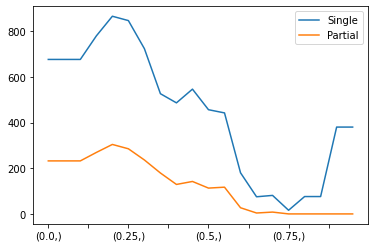

In [5]:
FA1.plot(y=['Single', 'Partial'])

## pValor = 0.01

In [6]:
FA2 = pd.DataFrame(columns=['Single','Partial','All'], index=[ind])
ind2=FA2.index.values
for i in range(0,20):
    FA2.loc[ind2[i]] = pd.Series({'Single':len(FA[1][i+1][0]), 'Partial':len(FA[1][i+1][2]), 'All':len(FA[1][i+1][1])})
#FA2.loc['Total'] = pd.Series({'Single':df['Single'].sum(), 'Partial':df['Partial'].sum(), 'All':df['All'].sum()})
FA2

,Single,Partial,All
0.0,332,97,0
0.05,332,97,0
0.1,332,97,0
0.15,327,90,0
0.2,356,97,0
0.25,341,101,0
0.3,277,75,0
0.35,211,52,0
0.4,210,33,0
0.45,283,38,0


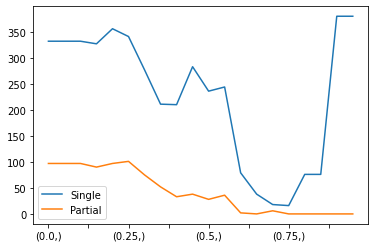

In [7]:
FA2.plot(y=['Single', 'Partial'])

## pValor = 0.01

In [8]:
FA3 = pd.DataFrame(columns=['Single','Partial','All'], index=[ind])
ind2=FA3.index.values
for i in range(0,20):
    FA3.loc[ind2[i]] = pd.Series({'Single':len(FA[2][i+1][0]), 'Partial':len(FA[2][i+1][2]), 'All':len(FA[2][i+1][1])})
#df.loc['Total'] = pd.Series({'Single':df['Single'].sum(), 'Partial':df['Partial'].sum(), 'All':df['All'].sum()})
FA3

,Single,Partial,All
0.0,109,20,0
0.05,109,20,0
0.1,109,20,0
0.15,100,14,0
0.2,76,16,0
0.25,69,14,0
0.3,58,5,0
0.35,35,4,0
0.4,30,4,0
0.45,108,13,0


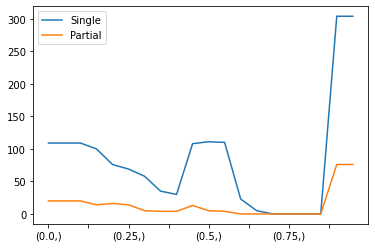

In [9]:
FA3.plot(y=['Single', 'Partial'])

# Resultats GM

In [10]:
with open("resultatsGM.pkl", "rb") as fp:   # Unpickling
    GM = pickle.load(fp)


#### Neteja de valors nan

In [11]:
pv=[0.05,0.01,0.001]
for d in range(3):
    pvalue=pv[d]
    for i in range(1,21):
        for j in range(len(GM[d][i][0])-1,0-1,-1):
            if np.isnan(GM[d][i][0][j][4]):
                GM[d][i][0].pop(j)
        if GM[d][i][1]:
            for j in range(len(GM[d][i][1])-1,0-1,-1):
                for k in range(len(GM[d][i][1][j][3])-1,0-1,-1):
                    if np.isnan(GM[d][i][1][j][3][k]):
                        GM[d][i][1][j][3].pop(k)
                if not GM[d][i][1][j][3]:
                    GM[d][i][1].pop(j)
                elif len(GM[d][i][1][j][3])<6:
                    GM[d][i][1].pop(j)
        if GM[d][i][2]:
            for j in range(len(GM[d][i][2])-1,0-1,-1):
                for k in range(len(GM[d][i][2][j][3])-1,0-1,-1):
                    if np.isnan(GM[d][i][2][j][3][k]):
                        GM[d][i][2][j][3].pop(k)
                    elif GM[d][i][2][j][3][k]>pvalue:
                        GM[d][i][2][j][3].pop(k)
                if len(GM[d][i][2][j][3])<=1:
                    GM[d][i][2].pop(j)
                    
            

## pValor = 0.05

In [12]:
ind=[str(i/20) for i in range(0,20)]    
GM1 = pd.DataFrame(columns=['Single','Partial','All'], index=[ind])
ind2=GM1.index.values
for i in range(0,20):
    GM1.loc[ind2[i]] = pd.Series({'Single':len(GM[0][i+1][0]), 'Partial':len(GM[0][i+1][2]), 'All':len(GM[0][i+1][1])})
#df.loc['Total'] = pd.Series({'Single':df['Single'].sum(), 'Partial':df['Partial'].sum(), 'All':df['All'].sum()})
GM1

,Single,Partial,All
0.0,588,185,0
0.05,532,164,0
0.1,534,160,0
0.15,508,145,0
0.2,447,126,0
0.25,432,125,0
0.3,436,130,0
0.35,444,129,0
0.4,442,128,0
0.45,462,136,0


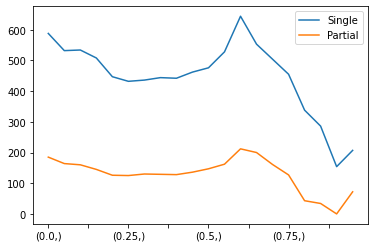

In [13]:
GM1.plot(y=['Single', 'Partial'])

## pValor = 0.01

In [14]:
GM2 = pd.DataFrame(columns=['Single','Partial','All'], index=[ind])
ind2=GM2.index.values
for i in range(0,20):
    GM2.loc[ind2[i]] = pd.Series({'Single':len(GM[1][i+1][0]), 'Partial':len(GM[1][i+1][2]), 'All':len(GM[1][i+1][1])})
#FA2.loc['Total'] = pd.Series({'Single':df['Single'].sum(), 'Partial':df['Partial'].sum(), 'All':df['All'].sum()})
GM2

,Single,Partial,All
0.0,180,34,0
0.05,175,40,0
0.1,196,37,0
0.15,176,29,0
0.2,159,38,0
0.25,170,42,0
0.3,177,44,0
0.35,183,42,0
0.4,180,41,0
0.45,179,39,0


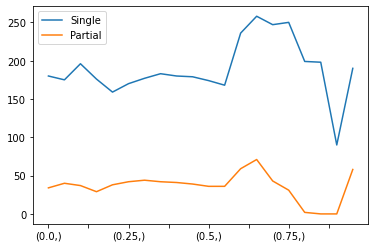

In [15]:
GM2.plot(y=['Single', 'Partial'])

## pValor = 0.01

In [16]:
GM3 = pd.DataFrame(columns=['Single','Partial','All'], index=[ind])
ind2=GM3.index.values
for i in range(0,20):
    GM3.loc[ind2[i]] = pd.Series({'Single':len(GM[2][i+1][0]), 'Partial':len(GM[2][i+1][2]), 'All':len(GM[2][i+1][1])})
#df.loc['Total'] = pd.Series({'Single':df['Single'].sum(), 'Partial':df['Partial'].sum(), 'All':df['All'].sum()})
GM3

,Single,Partial,All
0.0,25,1,0
0.05,31,1,0
0.1,74,2,0
0.15,58,4,0
0.2,36,4,0
0.25,46,7,0
0.3,51,7,0
0.35,52,6,0
0.4,55,6,0
0.45,56,7,0


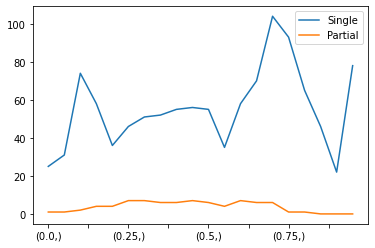

In [17]:
GM3.plot(y=['Single', 'Partial'])

# Resultats RS

In [18]:
with open("resultatsRS.pkl", "rb") as fp:   # Unpickling
    RS = pickle.load(fp)


#### Neteja de valors nan

In [19]:
pv=[0.05,0.01,0.001]
for d in range(3):
    pvalue=pv[d]
    for i in range(1,21):
        for j in range(len(RS[d][i][0])-1,0-1,-1):
            if np.isnan(RS[d][i][0][j][4]):
                RS[d][i][0].pop(j)
        if RS[d][i][1]:
            for j in range(len(RS[d][i][1])-1,0-1,-1):
                for k in range(len(RS[d][i][1][j][3])-1,0-1,-1):
                    if np.isnan(RS[d][i][1][j][3][k]):
                        RS[d][i][1][j][3].pop(k)
                if not RS[d][i][1][j][3]:
                    RS[d][i][1].pop(j)
                elif len(RS[d][i][1][j][3])<6:
                    RS[d][i][1].pop(j)
        if RS[d][i][2]:
            for j in range(len(RS[d][i][2])-1,0-1,-1):
                for k in range(len(RS[d][i][2][j][3])-1,0-1,-1):
                    if np.isnan(RS[d][i][2][j][3][k]):
                        RS[d][i][2][j][3].pop(k)
                    elif RS[d][i][2][j][3][k]>pvalue:
                        RS[d][i][2][j][3].pop(k)
                if len(RS[d][i][2][j][3])<=1:
                    RS[d][i][2].pop(j)
                    
            

## pValor = 0.05

In [20]:
ind=[str(i/20) for i in range(0,20)]    
RS1 = pd.DataFrame(columns=['Single','Partial','All'], index=[ind])
ind2=RS1.index.values
for i in range(0,20):
    RS1.loc[ind2[i]] = pd.Series({'Single':len(RS[0][i+1][0]), 'Partial':len(RS[0][i+1][2]), 'All':len(RS[0][i+1][1])})
#df.loc['Total'] = pd.Series({'Single':df['Single'].sum(), 'Partial':df['Partial'].sum(), 'All':df['All'].sum()})
RS1

,Single,Partial,All
0.0,411,19,0
0.05,444,139,0
0.1,269,72,0
0.15,224,54,0
0.2,247,59,0
0.25,254,63,0
0.3,253,61,0
0.35,296,76,0
0.4,306,79,0
0.45,316,83,0


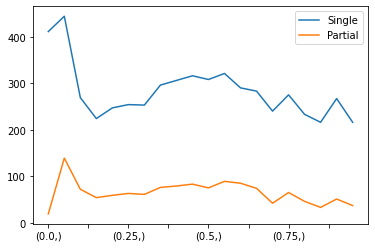

In [21]:
RS1.plot(y=['Single', 'Partial'])

## pValor = 0.01

In [22]:
RS2 = pd.DataFrame(columns=['Single','Partial','All'], index=[ind])
ind2=RS2.index.values
for i in range(0,20):
    RS2.loc[ind2[i]] = pd.Series({'Single':len(RS[1][i+1][0]), 'Partial':len(RS[1][i+1][2]), 'All':len(RS[1][i+1][1])})
#FA2.loc['Total'] = pd.Series({'Single':df['Single'].sum(), 'Partial':df['Partial'].sum(), 'All':df['All'].sum()})
RS2

,Single,Partial,All
0.0,281,55,0
0.05,39,7,0
0.1,43,8,0
0.15,39,8,0
0.2,35,9,0
0.25,43,9,0
0.3,42,8,0
0.35,69,14,0
0.4,60,5,0
0.45,71,11,0


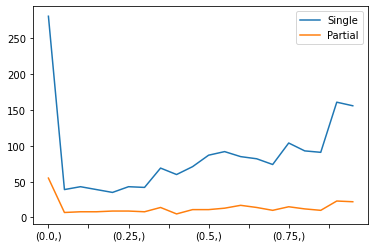

In [23]:
RS2.plot(y=['Single', 'Partial'])

## pValor = 0.01

In [24]:
RS3 = pd.DataFrame(columns=['Single','Partial','All'], index=[ind])
ind2=RS3.index.values
for i in range(0,20):
    RS3.loc[ind2[i]] = pd.Series({'Single':len(RS[2][i+1][0]), 'Partial':len(RS[2][i+1][2]), 'All':len(RS[2][i+1][1])})
#df.loc['Total'] = pd.Series({'Single':df['Single'].sum(), 'Partial':df['Partial'].sum(), 'All':df['All'].sum()})
RS3

,Single,Partial,All
0.0,205,76,0
0.05,1,0,0
0.1,3,0,0
0.15,5,1,0
0.2,4,0,0
0.25,3,0,0
0.3,8,0,0
0.35,10,0,0
0.4,9,0,0
0.45,12,2,0


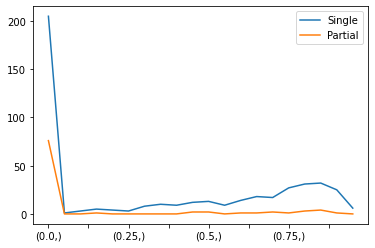

In [25]:
RS3.plot(y=['Single', 'Partial'])

# Conclusió